In [6]:
%matplotlib inline

import os

import numpy
import pandas
import librosa
import scipy.signal

import librosa.display
import matplotlib
from matplotlib import pyplot as plt


In [422]:

def load_samples(directory, sr=48000, duration=1.0):
    
    data = []
    
    for filename in os.listdir(directory):
        path = os.path.join(directory, filename)
        audio, sr = librosa.load(path, sr=sr, duration=duration)
    
        data.append({
            'path': path,
            'filename': filename,
            'audio': audio,
        })
    df = pandas.DataFrame.from_records(data)
    #df = df.set_index('filename')
    
    
    return df


samplerate = 48000
samples = load_samples('./data/drumsamples', sr=samplerate)
samples.loc[samples['filename'].str.contains('kick'), 'class'] = 'kick'
samples.loc[samples['filename'].str.contains('cymbal'), 'class'] = 'cymbal'
samples.loc[samples['filename'].str.contains('cow'), 'class'] = 'cowbell'
samples.loc[samples['filename'].str.contains('closed'), 'class'] = 'closed_hihat'
samples = samples.dropna(subset='class')
samples.head()

,path,filename,audio,class
0,./data/drumsamples/556184__soothsayer_orchestr...,556184__soothsayer_orchestra__hihatt-closed.wav,"[0.009566115, -0.011002866, 0.016104462, -0.01...",closed_hihat
1,./data/drumsamples/99766__menegass__cow.wav,99766__menegass__cow.wav,"[-0.0063294717, -0.00041792617, -0.07982029, -...",cowbell
3,./data/drumsamples/634822__collinb1000__closed...,634822__collinb1000__closed7.wav,"[0.00622438, -0.013703138, 0.022044374, -0.044...",closed_hihat
4,./data/drumsamples/331589__j_zealous__kick-jze...,331589__j_zealous__kick-jzealous-hard-club.aiff,"[0.000620265, 0.05115541, 0.045516394, -0.0934...",kick
5,./data/drumsamples/410149__screamstudio__kick-...,410149__screamstudio__kick-drum.wav,"[0.006504277, 0.048827853, 0.061693072, 0.0517...",kick


In [423]:
samples['class'].value_counts()

cowbell         10
kick            10
cymbal          10
closed_hihat     8
Name: class, dtype: int64

In [424]:

def spectrum_welch(audio, sr, n_fft, window='hann'):    
    """Method 2: Use Welch method. Uses overlapped complex spectrum"""
    
    if audio.shape[0] < n_fft:
        raise ValueError()
        
    freqs, power = scipy.signal.welch(audio, fs=sr, nfft=n_fft, window=window,
        scaling="spectrum", average='mean')
    db = librosa.power_to_db(power, ref=0.0, top_db=2*120)
    
    change = numpy.max(db) - numpy.min(db)
    
    return pandas.Series(db, index=freqs)


# clustering with custom distance function
# https://stackoverflow.com/questions/33721996/how-to-specify-a-distance-function-for-clustering
# https://gist.github.com/codehacken/8b9316e025beeabb082dda4d0654a6fa

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wasserstein_distance.html

ss = [ s for idx, s in samples['audio'].apply(spectrum_welch, sr=samplerate, n_fft=512*8).iterrows() ]
samples['spectrum'] = ss
samples

,path,filename,audio,class,spectrum
0,./data/drumsamples/556184__soothsayer_orchestr...,556184__soothsayer_orchestra__hihatt-closed.wav,"[0.009566115, -0.011002866, 0.016104462, -0.01...",closed_hihat,0.00000 44.018227 11.71875 47.076...
1,./data/drumsamples/99766__menegass__cow.wav,99766__menegass__cow.wav,"[-0.0063294717, -0.00041792617, -0.07982029, -...",cowbell,0.00000 60.688900 11.71875 63.674...
3,./data/drumsamples/634822__collinb1000__closed...,634822__collinb1000__closed7.wav,"[0.00622438, -0.013703138, 0.022044374, -0.044...",closed_hihat,0.00000 53.016441 11.71875 56.079...
4,./data/drumsamples/331589__j_zealous__kick-jze...,331589__j_zealous__kick-jzealous-hard-club.aiff,"[0.000620265, 0.05115541, 0.045516394, -0.0934...",kick,0.00000 70.371162 11.71875 73.550...
5,./data/drumsamples/410149__screamstudio__kick-...,410149__screamstudio__kick-drum.wav,"[0.006504277, 0.048827853, 0.061693072, 0.0517...",kick,0.00000 69.136795 11.71875 72.296...
6,./data/drumsamples/207956__altemark__cymbal.wav,207956__altemark__cymbal.wav,"[0.06790067, 0.0578044, 0.0067414767, -0.01181...",cymbal,0.00000 44.709816 11.71875 47.747...
7,./data/drumsamples/248142__dpren__fat-kick.aiff,248142__dpren__fat-kick.aiff,"[0.0026590228, 0.0120906085, 0.012507772, 0.00...",kick,0.00000 69.982803 11.71875 73.111...
8,./data/drumsamples/364919__gowlermusic__cowbel...,364919__gowlermusic__cowbell.wav,"[-2.2927441e-05, 1.4954283e-05, 1.2660133e-05,...",cowbell,0.00000 68.716812 11.71875 71.678...
9,./data/drumsamples/375613__samulis__cowbell-co...,375613__samulis__cowbell-cowbell_ff_2.wav,"[4.33924e-05, 3.198304e-05, 2.5953672e-05, 3.9...",cowbell,0.00000 53.000507 11.71875 55.974...
10,./data/drumsamples/34272__pj1s__cowbell.wav,34272__pj1s__cowbell.wav,"[0.09722103, -0.10205424, 0.097044334, 0.59205...",cowbell,0.00000 47.790169 11.71875 50.758...


In [425]:

def make_octave_bands():
    # NOTE: not entirelay equal to the conventional rounded values (250, 1000, etc)
    bins = 31
    bands = pandas.DataFrame({
        'lower': librosa.cqt_frequencies(bins, fmin=11.2, bins_per_octave=3).round(1),
        'center': librosa.cqt_frequencies(bins, fmin=12.5, bins_per_octave=3).round(1),
        'upper': librosa.cqt_frequencies(bins, fmin=14.1, bins_per_octave=3).round(1),
    }).set_index('center')
    return bands

def third_oct_spectrum(spectrum):
    bands = make_octave_bands()
    
    values = []
    for center, lower, upper in zip(bands.index, bands.lower, bands.upper):
        value = numpy.mean(spectrum.loc[lower:upper])
    
        values.append(value)
        #print(center, value)

    s = pandas.Series(values, index=bands.index, name='db')
    return s
        

samples['third_oct_spectrum'] = [ s for idx, s in samples['spectrum'].apply(third_oct_spectrum).iterrows() ]



In [426]:
def find_nearest(array, value):
    array = numpy.asarray(array)
    idx = (numpy.abs(array - value)).argmin()
    return array[idx]

def normalize_at_frequency(spectrum, freq=1000.0):
    band = find_nearest(spectrum.index, freq)
    val = spectrum.loc[band]

    normalized = spectrum - val
    return normalized
    
samples['normalized_third_oct_spectrum'] = [ s for idx, s in samples['third_oct_spectrum'].apply(normalize_at_frequency, freq=250).iterrows() ]


In [427]:
def spectrum_value(spectrum, freq=1000):
    #print(spectrum)
    band = find_nearest(spectrum.index, freq)
    val = spectrum.loc[band]
    #val = val / numpy.sum(spectrum)
    return val
    

samples['low_end'] = samples['normalized_third_oct_spectrum'].apply(spectrum_value, freq=100)
samples['high_end'] = samples['normalized_third_oct_spectrum'].apply(spectrum_value, freq=1000)


<AxesSubplot: xlabel='low_end', ylabel='high_end'>

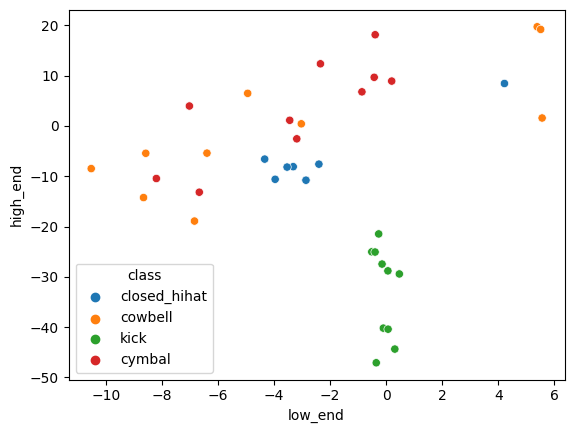

In [428]:
import seaborn

seaborn.scatterplot(data=samples, x='low_end', y='high_end', hue='class')


In [429]:

def compute_soundlevel(audio, sr=48000, resolution=0.125, silence_db=-120):

    hop_length = int(resolution*sr) 
    frame_length = hop_length

    rms = librosa.feature.rms(y=audio, frame_length=frame_length, hop_length=hop_length)[0, :]
    db_rms = librosa.power_to_db(rms)
    times = librosa.times_like(db_rms, hop_length=hop_length, sr=sr)
    
    s = pandas.Series(db_rms, index=times)
    s = s.fillna(silence_db)
    return s

def normalized_soundlevel(audio, **kwargs):
    sl = compute_soundlevel(audio, **kwargs)

    # move max soundlevel to t=0.0
    t_max_idx = sl.argmax()
    sl = sl.shift(-t_max_idx)
    
    # move max soundlevel to db=0.0
    sl = sl - sl.max()

    return sl
    
samples['soundlevel'] = [ s for idx, s in samples['audio'].apply(normalized_soundlevel, resolution=0.030).iterrows() ]


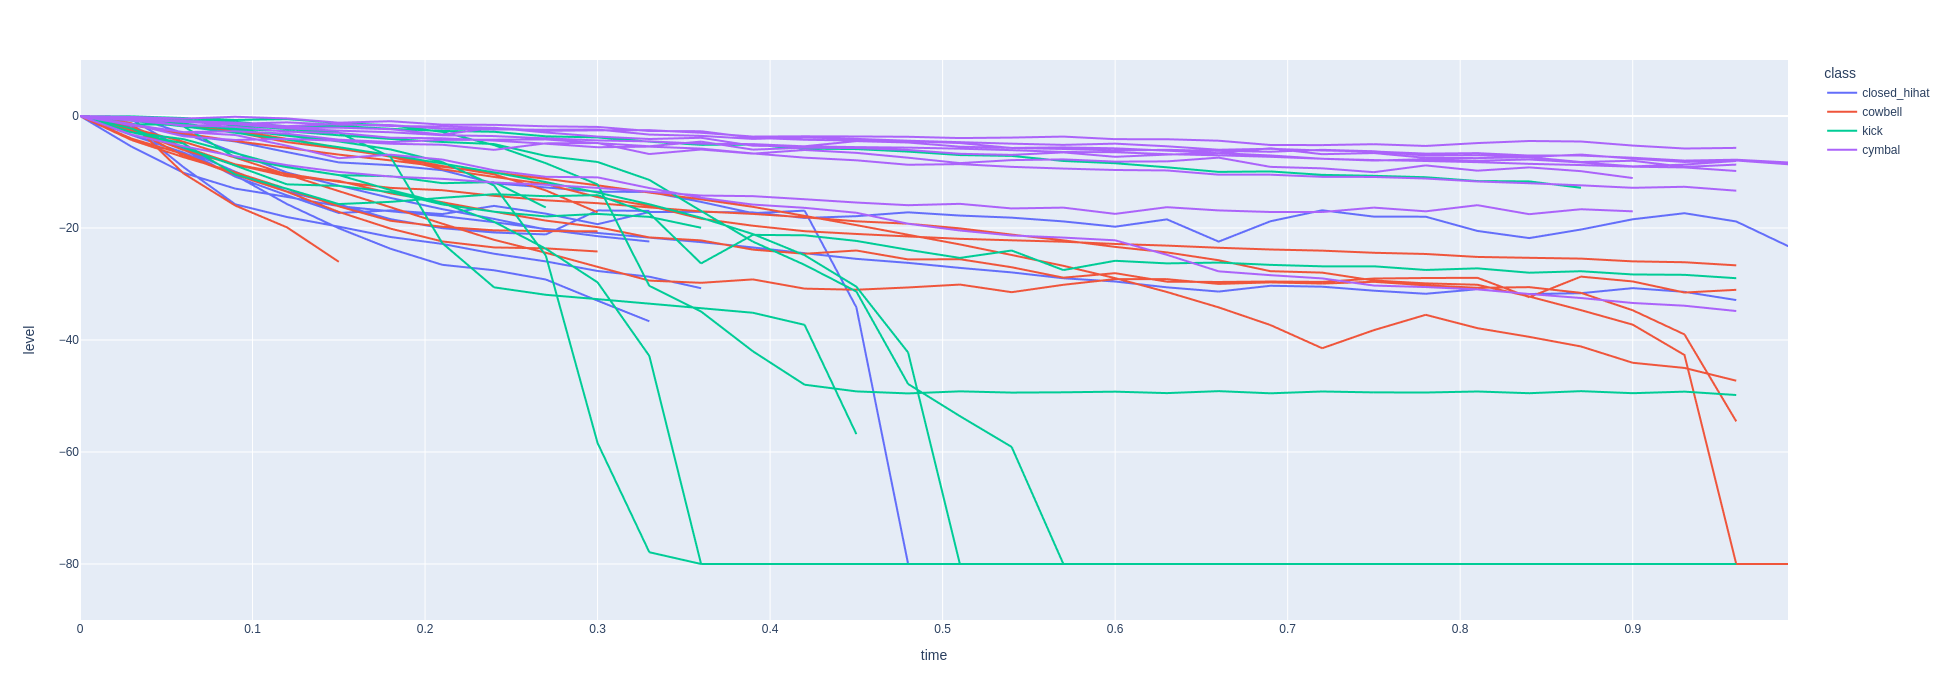

In [430]:

def to_long(samples, column='soundlevel', id_vars=['filename', 'class'], var_name='time', value_name='level'):

    s = samples.set_index('filename')
    sl = pandas.DataFrame( [f for f in s[column] ], index=s.index)
    
    mm = pandas.melt(sl.reset_index(), id_vars=['filename'], var_name=var_name, value_name=value_name)

    #print(mm['']
          
    mm = pandas.merge(mm, s, left_on='filename', right_index=True)
    
    return mm

def plot_soundlevels(samples):
    
    samples_soundlevels = to_long(samples)

    fig = plotly.express.line(samples_soundlevels, x='time', y='level', line_group='filename', color='class', height=700, width=1500)
    fig.update_layout(yaxis_range=[-90,10])
    return fig

fig = plot_soundlevels(samples)
fig

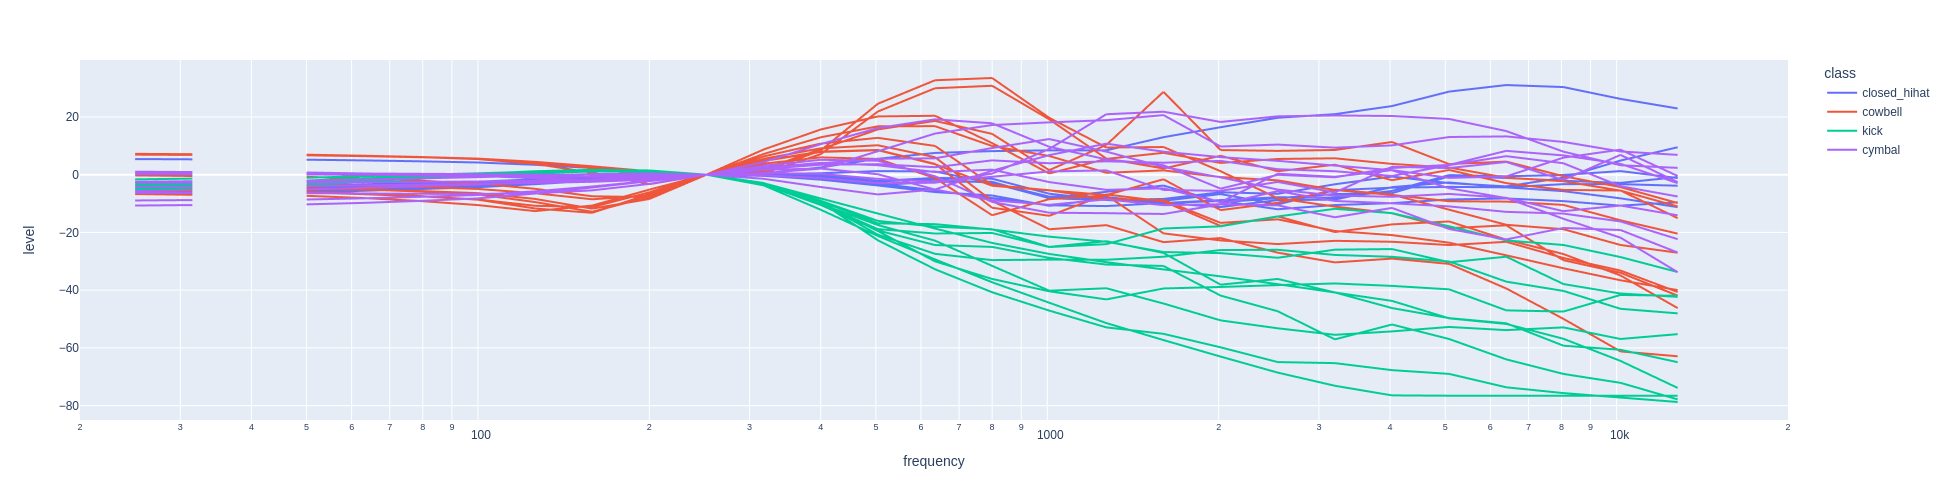

In [431]:

def plot_spectrums(samples, column='normalized_third_oct_spectrum'):

    samples_spectrum = to_long(samples, column=column, var_name='frequency')

    #print(samples_spectrum)
    
    values = samples_spectrum['level'].values
    y_max = numpy.quantile(values, q=0.99) + 10
    y_min = numpy.quantile(values, q=0.01) - 10
    
    fig = plotly.express.line(samples_spectrum, x='frequency', y='level', line_group='filename', color='class', height=500, width=1500, log_x=True)
    fig.update_layout(yaxis_range=[y_min, y_max])
    fig.update_layout(xaxis_range=[numpy.log10(20), numpy.log10(20000)])
    return fig
    
fig = plot_spectrums(samples, column='normalized_third_oct_spectrum')
fig

In [432]:
def soundlevel_value(soundlevels, t=0.250):
    idx = find_nearest(soundlevels.index, t)
    val = soundlevels.loc[idx]
    return val

samples['soundlevel_dropoff'] = samples['soundlevel'].apply(soundlevel_value, t=0.400) * -1.0


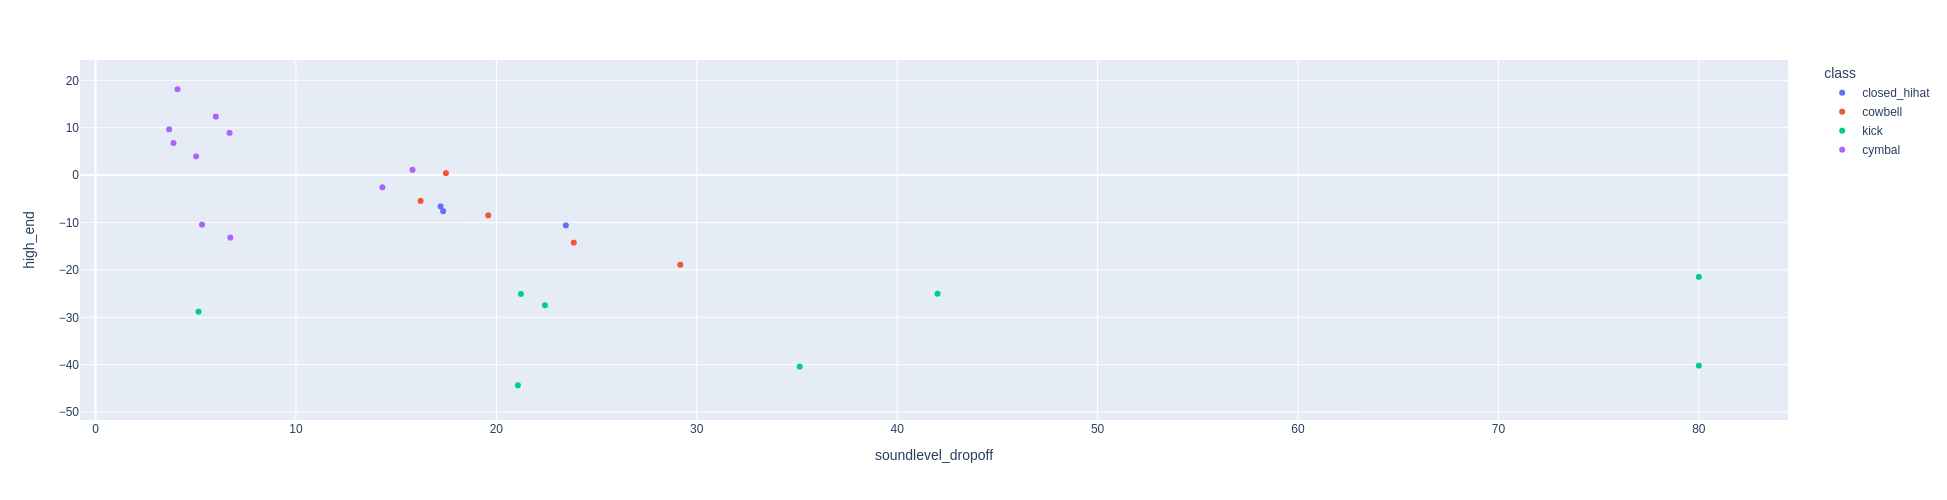

In [436]:
import plotly.express

plotly.express.scatter(samples, x='soundlevel_dropoff', y='high_end', color='class', hover_data=['filename'], width=500, height=500, hover_name='filename')

In [434]:

# TODO: allow playback of selected sample(s)


In [435]:

    
# TODO: try clustering. using simple features, using Euclidian distance on spectrum, using Wassterstain distance

